In [ ]:
import statsmodels as sm
import pandas as pd
import numpy as np
import datetime as dt
import math
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
!pip install pmdarima
import pmdarima as pmd

In [119]:
## Loading in the data 
from google.colab import drive
drive.mount('/content/drive', force_remount = True)
data = pd.read_csv('/content/drive/My Drive/7B15E011.csv')

Mounted at /content/drive


In [120]:
data['SurgDate'] = pd.to_datetime(data['SurgDate'])
data.head()

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,Mon,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,Tue,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,Wed,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,Thu,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,Fri,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106


In [121]:
#Check if there are any null-values or not
data.isnull().sum()

SurgDate    0
DOW         0
T - 28      0
T - 21      0
T - 14      0
T - 13      0
T - 12      0
T - 11      0
T - 10      0
T - 9       0
T - 8       0
T - 7       0
T - 6       0
T - 5       0
T - 4       0
T - 3       0
T - 2       0
T - 1       0
Actual      0
dtype: int64

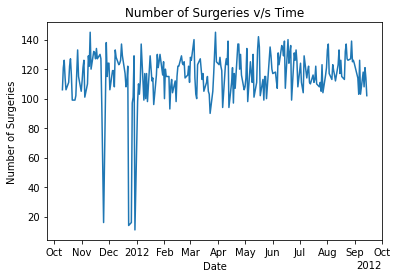

In [122]:
#Plot time series (Code referred from Python timeseries practice notebook uploaded on Moodle )
import matplotlib.dates as mdates
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(data['SurgDate'], data['Actual'])
plt.xlabel('Date')
plt.ylabel('Number of Surgeries')
plt.title('Number of Surgeries v/s Time')
plt.show()

In [123]:
#Converting Categorical data into numeric data
data['DOW'] = data['DOW'].apply(lambda x: ['Mon', 'Tue', 'Wed', 'Thu','Fri'].index(x))
data.head(6)

,SurgDate,DOW,T - 28,T - 21,T - 14,T - 13,T - 12,T - 11,T - 10,T - 9,T - 8,T - 7,T - 6,T - 5,T - 4,T - 3,T - 2,T - 1,Actual
0,2011-10-10,0,38,45,60,63,65,70,73,73,73,80,84,89,94,98,100,104,106
1,2011-10-11,1,35,47,65,68,78,82,82,82,86,89,92,95,99,99,99,114,121
2,2011-10-12,2,26,43,54,62,72,72,72,74,87,94,96,101,102,102,106,114,126
3,2011-10-13,3,28,48,65,70,72,72,72,82,87,91,94,94,94,97,98,103,114
4,2011-10-14,4,31,40,50,50,50,54,62,68,71,73,73,73,78,83,87,94,106
5,2011-10-17,0,41,56,65,69,72,73,77,78,78,80,86,85,86,92,96,102,111


In [124]:
#Random split into train and test data for regression
input_parameters=data.drop(['Actual'],axis=1)
target_values=data['Actual']
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(input_parameters,target_values,test_size=0.2,random_state=5)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


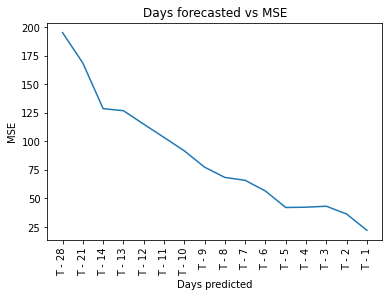

[195.14393930279144, 168.5471771761225, 128.63005029519255, 126.81412209701591, 115.04680829267289, 103.44614813313007, 91.70290699387992, 77.39631683274776, 68.4262395217159, 65.88369454627203, 56.5097580386982, 42.10048192669197, 42.368158107757644, 43.21362575550543, 36.3961458415403, 22.15810236196602]


In [165]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
mse=[]
model=LinearRegression()
for i in range(2,18):
    model.fit(X_train.iloc[:,i].values.reshape(-1,1),y_train)
    predictions=model.predict(X_test.iloc[:,i].values.reshape(-1,1))
    mse.append(mean_squared_error(predictions,y_test))
plt.plot(X_train.columns[2:],mse)
plt.xlabel('Days predicted')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title("Days forecasted vs MSE")
plt.show()
print(mse)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


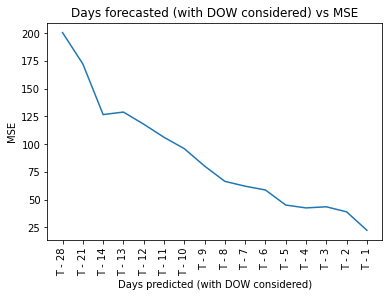

[200.59883589696483, 172.3967755325261, 126.70800984723857, 128.96418277965523, 118.04935492484292, 106.2311351583685, 95.98477631305111, 80.28278447370202, 66.4887651406226, 62.144841715735616, 58.707804817436084, 45.118547055811916, 42.55657516406145, 43.56313341876356, 39.0041929414882, 22.378152761742122]


In [167]:
mse_new=[]
model=LinearRegression()
for i in range(2,18):
    model.fit(X_train.loc[:,['DOW',X_train.columns[i]]],y_train)
    predictions=model.predict(X_test.loc[:,['DOW',X_train.columns[i]]])
    mse_new.append(mean_squared_error(predictions,y_test))
plt.plot(X_train.columns[2:],mse_new)
plt.xlabel('Days predicted (with DOW considered)')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title("Days forecasted (with DOW considered) vs MSE")
plt.show()
print(mse_new)

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


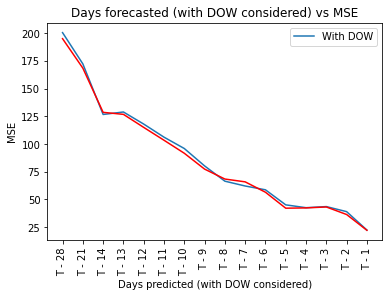

In [135]:
plt.plot(X_train.columns[2:],mse_new,label='With DOW')
plt.plot(X_train.columns[2:],mse,color='red')
plt.xlabel('Days predicted (with DOW considered)')
plt.xticks(rotation=90)
plt.ylabel('MSE')
plt.title("Days forecasted (with DOW considered) vs MSE")
plt.legend()
plt.show()

### **Time** **Series** **Approach**

In [137]:
#Time Series

X_train_timeseries=data.loc[:191,'SurgDate']
X_test_timeseries=data.loc[192:,'SurgDate']
y_train_timeseries=data.loc[:191,'Actual']
y_test_timeseries=data.loc[192:,'Actual']

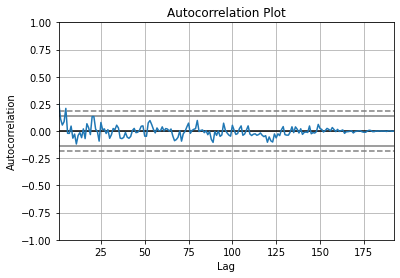

In [138]:
from pandas.plotting import autocorrelation_plot
actual = np.array(y_train_timeseries)
autocorrelation_plot(actual)
plt.title('Autocorrelation Plot')
plt.show()

## **Mean** **Baseline**

In [139]:
predictions_df = pd.DataFrame(X_test_timeseries)
predictions_df = predictions_df.reset_index(drop = True)
predictions_df['mean_baseline']=y_train_timeseries.mean()
predictions_df.head()


,SurgDate,mean_baseline
0,2012-07-09,115.848958
1,2012-07-10,115.848958
2,2012-07-11,115.848958
3,2012-07-12,115.848958
4,2012-07-13,115.848958


## **Naive** **Baseline**

In [140]:
yT = y_train_timeseries[len(y_train_timeseries) - 1]
predictions_df['Naive_baseline'] = yT
predictions_df.head()

,SurgDate,mean_baseline,Naive_baseline
0,2012-07-09,115.848958,129
1,2012-07-10,115.848958,129
2,2012-07-11,115.848958,129
3,2012-07-12,115.848958,129
4,2012-07-13,115.848958,129


# **Seasonal** **Naive**

In [141]:
h_max=49
m=5
pred_list = []
T=len(y_train_timeseries)
for h in range(1, h_max + 1): 
    k = math.floor((h - 1)/m)
    index = T + h - m * (k + 1)
    pred_list.append(y_train_timeseries[index - 1])
predictions_df['seasonal_naive_baseline'] = pred_list
predictions_df.head()

,SurgDate,mean_baseline,Naive_baseline,seasonal_naive_baseline
0,2012-07-09,115.848958,129,108
1,2012-07-10,115.848958,129,124
2,2012-07-11,115.848958,129,111
3,2012-07-12,115.848958,129,104
4,2012-07-13,115.848958,129,129


## **Drift**

In [142]:
drift = []
y1=y_train_timeseries[0]
for h in range(1, h_max+1): 
    result = yT + h * ((yT-y1) / (T-1))
    drift.append(result)
predictions_df['drift_baseline'] = drift
predictions_df.head()

,SurgDate,mean_baseline,Naive_baseline,seasonal_naive_baseline,drift_baseline
0,2012-07-09,115.848958,129,108,129.120419
1,2012-07-10,115.848958,129,124,129.240838
2,2012-07-11,115.848958,129,111,129.361257
3,2012-07-12,115.848958,129,104,129.481675
4,2012-07-13,115.848958,129,129,129.602094


**Plotting** **Baseline** **Methods** **for** Comparison

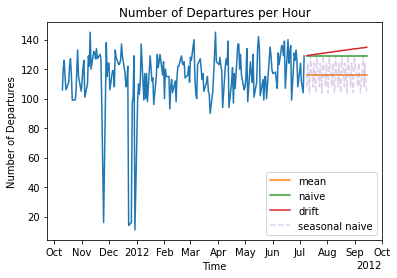

In [143]:
locator = mdates.AutoDateLocator(minticks = 10, maxticks = 15)
formatter = mdates.ConciseDateFormatter(locator)
plt.gca().xaxis.set_major_locator(locator) 
plt.gca().xaxis.set_major_formatter(formatter)


plt.plot(X_train_timeseries, y_train_timeseries)
## Your plotting code here to add the baseline methods
plt.plot(predictions_df['SurgDate'], predictions_df['mean_baseline'], label = 'mean')
plt.plot(predictions_df['SurgDate'], predictions_df['Naive_baseline'], label = 'naive')
plt.plot(predictions_df['SurgDate'], predictions_df['drift_baseline'], label = 'drift')
plt.plot(predictions_df['SurgDate'], predictions_df['seasonal_naive_baseline'], label = 'seasonal naive', linestyle = '--', alpha = 0.3)
plt.xlabel('Time')
plt.ylabel('Number of Departures')
plt.title('Number of Departures per Hour')
plt.legend()
plt.show()

## **Prophet** **Model**

In [ ]:
!pip install prophet
from prophet import Prophet

In [151]:
prophet_data=data.loc[:191,['SurgDate','Actual']]
prophet_data = prophet_data.rename(columns={'SurgDate': 'ds', 'Actual': 'y'})
prophet_data.head()

,ds,y
0,2011-10-10,106
1,2011-10-11,121
2,2011-10-12,126
3,2011-10-13,114
4,2011-10-14,106


In [152]:
m = Prophet()
m.fit(prophet_data)

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [153]:
periods = h_max
frequency = 'D'
future = m.make_future_dataframe(periods = periods, freq = frequency, include_history = False)

In [154]:
forecast = m.predict(future)
predictions_df['Prophet'] = forecast['yhat']

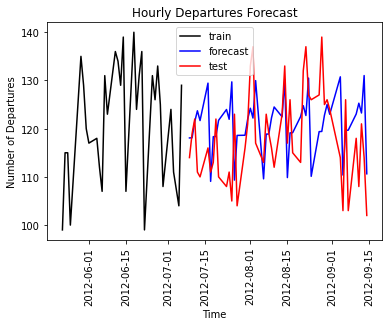

In [155]:
plt.plot(X_train_timeseries[160:],y_train_timeseries[160:],color='black',label='train')
plt.plot(X_test_timeseries, forecast['yhat'], color = 'blue', label = 'forecast')
plt.plot(X_test_timeseries, y_test_timeseries, color = 'red', label = 'test')
plt.title('Hourly Departures Forecast')
plt.xlabel('Time')
plt.ylabel('Number of Departures')
plt.xticks(rotation=90)
plt.legend()
plt.show()

## **AUTO**-**ARIMA**

In [156]:
m=5
seasonal = True
autoarima_model = pmd.auto_arima(y_train_timeseries, seasonal = True, trace = True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=0.48 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1681.890, Time=0.02 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1670.900, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1672.582, Time=0.09 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=2376.909, Time=0.01 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1672.450, Time=0.12 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=1672.653, Time=0.10 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=1674.443, Time=0.15 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=1760.066, Time=0.02 sec

Best model:  ARIMA(1,0,0)(0,0,0)[0] intercept
Total fit time: 1.068 seconds


In [157]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(y_train_timeseries,order=(1,1,5))
model=model.fit()

In [158]:
start=len(X_train_timeseries)
end=len(X_train_timeseries)+len(y_test_timeseries)-1
predictions_df['autoarima']=model.predict(start=start,end=end).values

In [159]:
predictions_df['autoarima'] = autoarima_model.predict(len(X_test_timeseries))

In [160]:
predictions_df['Actual']=y_test_timeseries.values

In [161]:
predictions_df.head()

,SurgDate,mean_baseline,Naive_baseline,seasonal_naive_baseline,drift_baseline,Prophet,autoarima,Actual
0,2012-07-09,115.848958,129,108,129.120419,118.078044,119.218458,114
1,2012-07-10,115.848958,129,124,129.240838,118.115451,116.714470,119
2,2012-07-11,115.848958,129,111,129.361257,121.463629,116.073471,122
3,2012-07-12,115.848958,129,104,129.481675,123.712878,115.909381,111
4,2012-07-13,115.848958,129,129,129.602094,121.681212,115.867375,110


**Sum** **of** **squared** **error**

In [162]:
mean_baseline_error=((predictions_df['mean_baseline'] - predictions_df['Actual']) ** 2).sum()
print('mean_baseline_error:',mean_baseline_error)
Naive_baseline_error=((predictions_df['Naive_baseline'] - predictions_df['Actual']) ** 2).sum()
print('Naive_baseline_error:',Naive_baseline_error)
seasonal_baseline_error=((predictions_df['seasonal_naive_baseline'] - predictions_df['Actual']) ** 2).sum()
print('seasonal_baseline_error:',seasonal_baseline_error)
Prophet_error=((predictions_df['Prophet'] - predictions_df['Actual']) ** 2).sum()
print('Prophet_error:',Prophet_error)
autoarima_error=((predictions_df['autoarima'] - predictions_df['Actual']) ** 2).sum()
print('autoarima_error:',autoarima_error)

mean_baseline_error: 4492.669949001736
Naive_baseline_error: 9590
seasonal_baseline_error: 9480
Prophet_error: 5290.608121701782
autoarima_error: 4508.838084609313


## **MSE**

In [163]:
from sklearn.metrics import mean_squared_error
mean_baseline_error_mse=mean_squared_error(predictions_df['mean_baseline'],predictions_df['Actual'])
Naive_baseline_error_mse=mean_squared_error(predictions_df['Naive_baseline'],predictions_df['Actual'])
seasonal_baseline_error_mse=mean_squared_error(predictions_df['seasonal_naive_baseline'],predictions_df['Actual'])
Prophet_error_mse=mean_squared_error(predictions_df['Prophet'],predictions_df['Actual'])
autoarima_error_mse=mean_squared_error(predictions_df['autoarima'],predictions_df['Actual'])
print('mean_baseline_error:',mean_baseline_error_mse)
print('Naive_baseline_error:',Naive_baseline_error_mse)
print('seasonal_baseline_error:',seasonal_baseline_error_mse)
print('Prophet_error:',Prophet_error_mse)
print('autoarima_error:',autoarima_error_mse)

mean_baseline_error: 91.68714181636197
Naive_baseline_error: 195.71428571428572
seasonal_baseline_error: 193.46938775510205
Prophet_error: 107.97159432044452
autoarima_error: 92.01710376753701
